# Carto Le Grand Débat

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import os

from descartes import PolygonPatch
from sklearn.preprocessing import MinMaxScaler
import json 
import scipy as sp
from scipy.sparse import linalg
from shapely.geometry import asShape # manipulating geometry

In [2]:
if os.getenv("HOME")=="/home/louis":
    data_folder = "/home/louis/Documents/Data_science/YJ_PROJECT/Data/Data/"
else:
    data_folder = ""

## Load data

In [68]:
properties = pd.read_csv(data_folder+'Carto/GN_conso_dep_level.csv')
properties['DEP']=properties['DEP'].astype(str).str.zfill(2)



In [69]:
with open(data_folder+"Carto/departements-version-simplifiee.geojson") as geojson_file:
    geojson_data = json.load(geojson_file) # or geojson.load(json_file)

## Function for plotting map

In [92]:
def add_property(geojson_data,prop):
    n =len(geojson_data["features"])
    
    properties[prop+"_norm"]=pd.cut(properties[prop],100,labels=False)

    for i in range(n):
        try:
            geojson_data["features"][i]['properties'][prop]=properties.loc[properties.DEP==geojson_data["features"][i]['properties']['code'],prop+"_norm"].tolist()[0]
        except:
            print('error for '+str(i))
   

In [89]:
# we plot the map with Descarte package


def plot_map(geojson_data,properties):

    fig = plt.figure(figsize=(20,20)) # create a figure to contain the plot elements
    ax = fig.gca(xlabel="Longitude", ylabel="Latitude")


    for feat in geojson_data["features"]:
        try:
            R = 1-float(feat["properties"][properties])/100.0
            G = 0
            B = 0
        except:
            R=1
            G=1
            B=1
        # convert the geometry to shapely
        geom = asShape(feat["geometry"])
        # obtain the coordinates of the feature's centroid
        x, y = geom.centroid.x, geom.centroid.y
        # plot the centroids
        ax.plot(x, y, 'ro')
        ax.text(x, y, feat["properties"]["nom"], fontsize=10)
        # plot the polygon features: type help(PolygonPatch) for more args
        ax.add_patch(PolygonPatch(feat["geometry"], facecolor=[R,G,B], ec='white',
                    alpha=0.5, lw=0.5, ls='--', zorder=2))

error for 28
error for 29


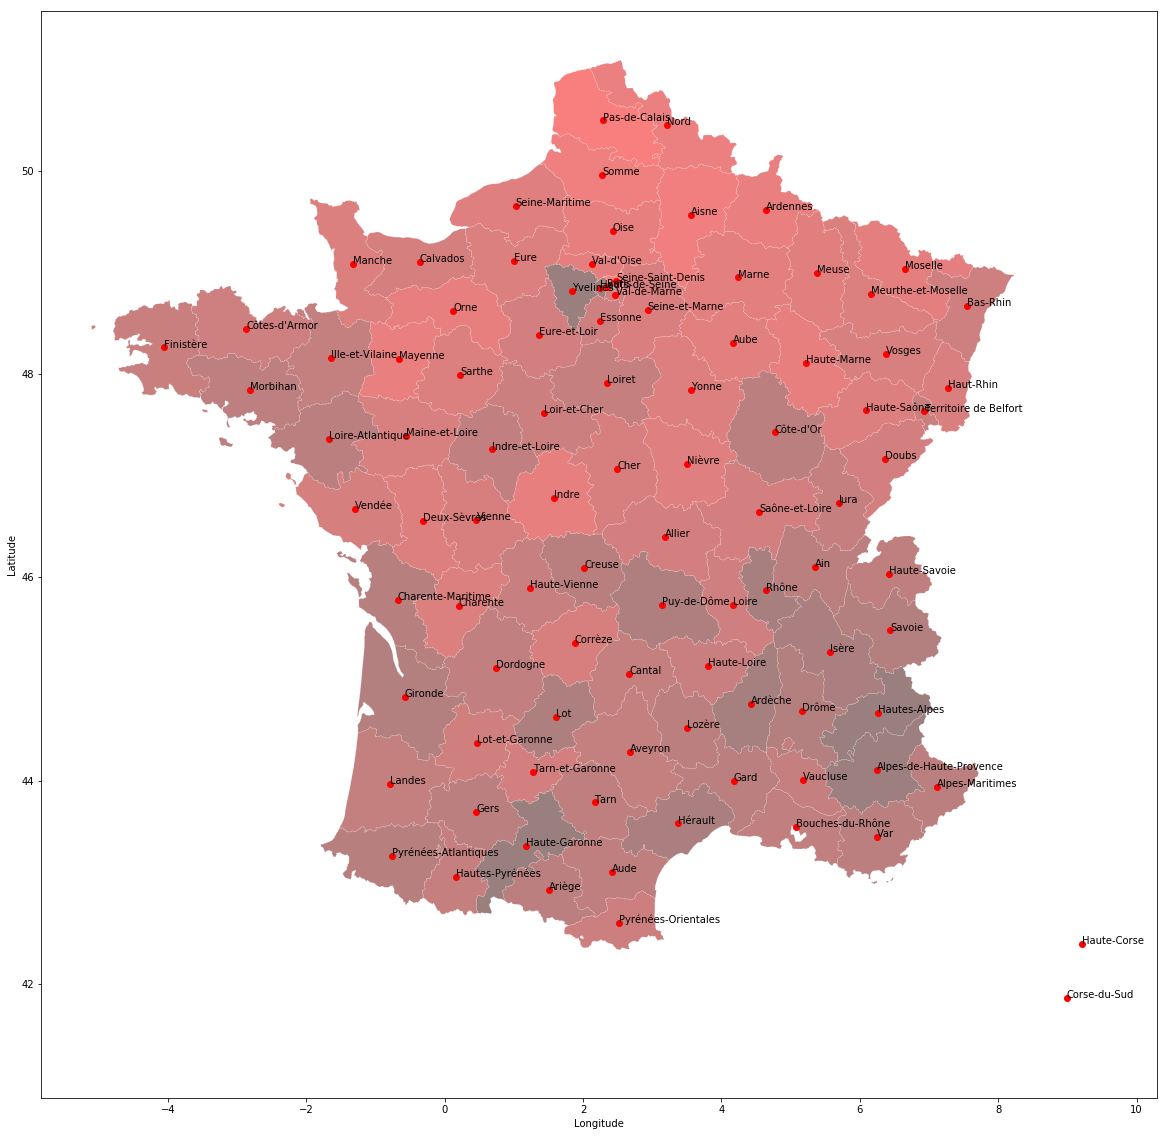

In [93]:
add_property(geojson_data,"Count_pourmil")
plot_map(geojson_data,"Count_pourmil")


In [77]:
for i in range(len(geojson_data["features"])):
    geojson_data["features"][i][geojson_data["features"][i]['properties']['code']]={}
    print(geojson_data["features"][i]['properties'])

{'code': '01', 'nom': 'Ain', 'Count_pourmil': 53.0}
{'code': '02', 'nom': 'Aisne', 'Count_pourmil': 10.0}
{'code': '03', 'nom': 'Allier', 'Count_pourmil': 34.0}
{'code': '04', 'nom': 'Alpes-de-Haute-Provence', 'Count_pourmil': 76.0}
{'code': '05', 'nom': 'Hautes-Alpes', 'Count_pourmil': 79.0}
{'code': '06', 'nom': 'Alpes-Maritimes', 'Count_pourmil': 53.0}
{'code': '07', 'nom': 'Ardèche', 'Count_pourmil': 69.0}
{'code': '08', 'nom': 'Ardennes', 'Count_pourmil': 17.0}
{'code': '09', 'nom': 'Ariège', 'Count_pourmil': 52.0}
{'code': '10', 'nom': 'Aube', 'Count_pourmil': 22.0}
{'code': '11', 'nom': 'Aude', 'Count_pourmil': 50.0}
{'code': '12', 'nom': 'Aveyron', 'Count_pourmil': 46.0}
{'code': '13', 'nom': 'Bouches-du-Rhône', 'Count_pourmil': 47.0}
{'code': '14', 'nom': 'Calvados', 'Count_pourmil': 32.0}
{'code': '15', 'nom': 'Cantal', 'Count_pourmil': 46.0}
{'code': '16', 'nom': 'Charente', 'Count_pourmil': 27.0}
{'code': '17', 'nom': 'Charente-Maritime', 'Count_pourmil': 55.0}
{'code': '18